# Grundlagen der Multimediatechnik
## Wintersemester 2021/2022

### Studierenden Informationen

Wir benötigen einige allgemeine Informationen über die Teilnehmer dieser Vorlesung. Das würde uns später viel Zeit sparen. Danke!

<b>Vorname:</b>Tina, Laura<br>
<b>Nachname:</b>Truong, "Dr. Dr." Bantle "Graphicdesign Is My Passion"<br>
<b>Matrikelnummer:</b>5430589, 5424980<br>
<b>Studiengang (und angestrebter Abschluss B.Sc./M.Sc./...):</b>Medieninformatik B.sc., Medieninformatik B.sc.<br>

## Übungsblatt 1

<b>Wichtig</b>: Bitte kennzeichnen Sie Ihre Abgabe mit Ihrem Namen und dem Namen Ihres Übungspartners. <br>
Laden Sie bitte Ihre Abgabe als PDF-/ZIP-Datei auf der ILIAS-Plattform hoch. Andere Dateiformate sowie Scans von handgeschriebenen Abgaben werden nicht gewertet. Achten Sie darauf, nur kompilierbaren, kommentierten Code abzugeben. Nicht-kompilierbarer Code wird mit <b>0 Punkten</b> bewertet! \\
Alle Abgaben müussen folgender Namenskonvention entsprechen:  `gmt_uebungXX_nachname1_nachname2.format` <br>
Im Falle Ihres Notebooks: `gmt_uebungXX_nachname1_nachmame2.ipynb`

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import math

### Aufgabe 3.1 - Farbräume 1 (4 Punkte)

Zeigen Sie anhand einer Berechnung für das YCbCr-Modell, dass die Eckpunkte des RGB-Kubus (mit 8 Bit Genauigkeit pro Farbkanal) innerhalb des YCbCr-Kubus (Y-Werte von 16 bis 235, Rest von 16 bis 240) liegen, indem Sie zeigen, dass alle seine Eckpunkte darin liegen. Gehen Sie dabei von folgender Formel aus (welche einen Punkt aus dem RGB Raum in den YCbCr Raum überträgt):
$$\text{YCbCr} = 
\begin{pmatrix}
    0.183 & 0.614 & 0.062 \\
    -0.101 &  -0.338 & 0.439 \\
    0.439 &  -0.399 &  -0.040
\end{pmatrix} \cdot
\begin{pmatrix}
    \text{R} \\ \text{G} \\ \text{B}
\end{pmatrix} +
\begin{pmatrix}
    16 \\ 128 \\ 128
\end{pmatrix}$$
Vervollständigen Sie dafür die Funktion `rgb_to_ycbcr`, die ein `numpy`-Array mit RGB-Farben als Input bekommt und ein `numpy`-Array mit YCbCr-Farben zurückgibt. Speichern Sie zuerst alle Eckpunkte des RGB-Kubus mit 8 Bit Genauigkeit pro Farbkanal in ein `numpy`-Array. <br>
<b>Hinweis:</b> `rgb_edge` ist ein 2-dimensionales Array der Größe $8\times 3$.

In [2]:
edge_red = [255,0,0]
edge_green = [0,255,0]
edge_blue = [0,0,255]
edge_white = [255,255,255]
edge_black = [0,0,0]
edge_cyan = [0,255,255]
edge_magenta = [255,0,255]
edge_yellow = [255,255,0]

rgb_edges = np.array([ edge_black, edge_red, edge_blue,
                       edge_green, edge_yellow, edge_magenta,
                       edge_cyan, edge_white])
rgb_edges.shape
# print(rgb_edges)

(8, 3)

In [12]:
def rgb2ycbcr(rgb): # 3 Punkte
    # TODO
    transMatrix2ycbcr = np.array([ [0.183, 0.614, 0.062],
                               [-0.101, -0.338, 0.439],
                               [0.439, -0.399, -0.040] ])
    ycbcr = transMatrix2ycbcr.dot(rgb) + np.array([16,128,128])
    return ycbcr

In [13]:
for rgb in rgb_edges:
    ycbcr = rgb2ycbcr(rgb)
    print("{} -> {}" .format(rgb, ycbcr))

TypeError: type numpy.ndarray doesn't define __round__ method

### Aufgabe 3.2 - Farbäume 2 (8 Punkte)

Vervollständigen Sie die Funktion `rgb2hsv`, die einen beliebigen RGB-Farbwert (mit 8 Bit Genauigkeit pro Farbkanal) in HSV-Farbwert transformiert, und die Funktion `hsv2rgb`, die den zuvor berechneten HSV-Farbwert zurück transformiert. Beide Funktionen erhalten einen `numpy`-Array mit 3 Werten als Input und geben einen `numpy`-Array mit der gleichen Dimensionalität zurück. <br>
<b>Hinweis:</b> Vergessen Sie nicht, die Farben richtig umzurechnen.

In [14]:
def rgb2hsv(rgb):
    # TODO
    colorIsBlack = (rgb == np.array([0,0,0])).all()
    if colorIsBlack:
        value = 0
        saturation = 0
        hue = 0
    else:
        maxRGB = max(rgb)
        minRGB = min(rgb)
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]

        value = maxRGB # 0...255
        saturation = round( (maxRGB-minRGB)/maxRGB, 2)# in intervall [0 1]

        def getHue():
            def getColor(c):
                minSubtrMax = maxRGB-minRGB
                if minSubtrMax == 0:
                    color = 0
                else:
                    color = (maxRGB-c)/minSubtrMax
                return color

            r_s = getColor(r)
            g_s = getColor(g)
            b_s = getColor(b)
            h_s = 0

            if maxRGB == r:
                h_s = b_s - g_s
            elif maxRGB == g:
                h_s = r_s - b_s + 2
            elif maxRGB == b:
                h_s = g_s - r_s + 4
            return round( (h_s / 6)%1, 2)
        hue = getHue() #[0 1]

    hsv = np.array( [hue,saturation,value]) # [0 1], [0 1], 0..255,
    return hsv

def hsv2rgb(hsv):
    # TODO
    h = hsv[0]
    s = hsv[1]
    v = hsv[2]

    h_s = (6 * h)%6
    c1 = math.floor(h_s)
    c2 = h_s - c1
    w1 = (1 - s) * v
    w2 = (1 - s * c2) * v
    w3 = (1 - s * (1 - c2))* v

    def getRGB():
        switcher = {
            0: (v,w3,w1),
            1: (w2,v,w1),
            2: (w1,v,w3),
            3: (w1,w2,v),
            4: (w3,w1,v),
            5: (v,w1,w2)
        }
        rgb = np.array( switcher.get(c1) )
        rgb = rgb.transpose()
        rgb = rgb.round()
        return rgb

    return getRGB()

In [15]:
# enter 3 rgb values separated by comma, e.g. 0,0,0 for black
col = input()

Entered rgb color: [155  25  30]


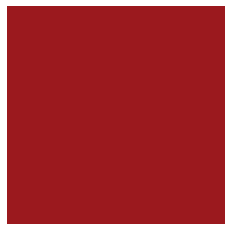

In [16]:
rgb_col = np.array([int(c) for c in col.split(',')])
rgb_col[rgb_col<0] = 0
rgb_col[rgb_col>255] = 255

img_rgb = np.zeros((10,10,3), dtype=np.uint8)
img_rgb[:] = rgb_col
print("Entered rgb color: {}" .format(rgb_col))
plt.axis('off')
plt.imshow(img_rgb)
plt.show()

In [17]:
hsv_col = rgb2hsv(rgb_col)
print("Your calculated hsv color from rgb: {}" .format(hsv_col)) # matplotlib cant plot hsv image

Your calculated hsv color from rgb: [  0.99   0.84 155.  ]


Your back-calculated rgb color from hsv: [155.  25.  33.]


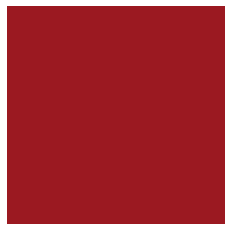

In [18]:
rgb_col = hsv2rgb(hsv_col)
img_rgb = np.zeros((10,10,3), dtype=np.uint8)
img_rgb[:] = rgb_col
print("Your back-calculated rgb color from hsv: {}" .format(rgb_col))
plt.axis('off')
plt.imshow(img_rgb)
plt.show()